In [32]:
from pathlib import Path
import matplotlib.pyplot as plt

import numpy as np 
import pickle

In [33]:
root = Path("./results")
filsMNAR = list(root.glob("./MNAR_logi_*.pkl"))
filsMAR = list(root.glob("./MAR_logi_*.pkl"))
filsEM = list(root.glob("./EM_logi_*.pkl"))
#fils = sorted(fils, key=name2mn)

In [34]:
def path2m(fil):
    m = int(fil.stem.split("m")[1].split("_")[0])
    return m

In [35]:
filsMNAR = sorted(filsMNAR, key=path2m)
filsMAR = sorted(filsMAR, key=path2m)
filsEM = sorted(filsEM, key=path2m)

In [36]:
filsMNAR

[PosixPath('results/MNAR_logi_p100_m100_simu3_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu1_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu6_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu4_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu7_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu5_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu9_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu10_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu2_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m100_simu8_iter1000.pkl'),
 PosixPath('results/MNAR_logi_p100_m200_simu2_iter945.pkl'),
 PosixPath('results/MNAR_logi_p100_m200_simu3_iter945.pkl'),
 PosixPath('results/MNAR_logi_p100_m200_simu7_iter945.pkl'),
 PosixPath('results/MNAR_logi_p100_m200_simu4_iter945.pkl'),
 PosixPath('results/MNAR_logi_p100_m200_simu6_iter945.pkl'),
 PosixPath('results/MNAR_logi_p100_m200_simu8_iter945.pkl'),
 PosixPath('r

some parameters 

In [37]:
from collections import defaultdict as ddict

errTsMNAR = ddict(list)
errBsMNAR = ddict(list)
for curFil in filsMNAR:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsMNAR[m].append(errT)
    errBsMNAR[m].append(errb)

In [38]:
errTsMAR = ddict(list)
errBsMAR = ddict(list)
for curFil in filsMAR:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsMAR[m].append(errT)
    errBsMAR[m].append(errb)

In [39]:
errTsEM = ddict(list)
errBsEM = ddict(list)
for curFil in filsEM:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsEM[m].append(errT)
    errBsEM[m].append(errb)

In [40]:
ms = [100, 200, 400, 800, 1600]
errBs = ddict(list)
errTs = ddict(list)
for m in ms:
    errBs["MNAR"].append(np.mean(errBsMNAR[m]))
    errBs["MAR"].append(np.mean(errBsMAR[m]))
    errBs["EM"].append(np.mean(errBsEM[m]))
    
    errTs["MNAR"].append(np.mean(errTsMNAR[m]))
    errTs["MAR"].append(np.mean(errTsMAR[m]))
    errTs["EM"].append(np.mean(errTsEM[m]))

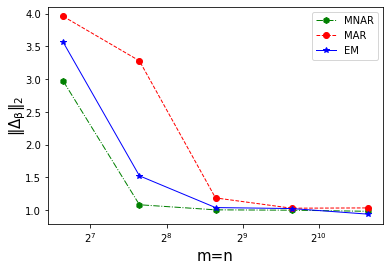

In [41]:
font_y = {"size": 15, "va":"baseline"}
font_x = {"size": 15}
# plt.ylim([0, 3.8])
plt.xlabel("m=n", font_x)
plt.ylabel(r"$\Vert\Delta_{\mathrm{\beta}}\Vert_2$", font_y)
plt.xscale("log", base=2)
plt.plot(ms, errBs["MNAR"][:], "g-.h", label="MNAR", linewidth=1)
plt.plot(ms[:], errBs["MAR"][:], "r--o", label="MAR", linewidth=1)
plt.plot(ms[:], errBs["EM"][:], "b-*", label="EM", linewidth=1)
plt.legend(loc=1)

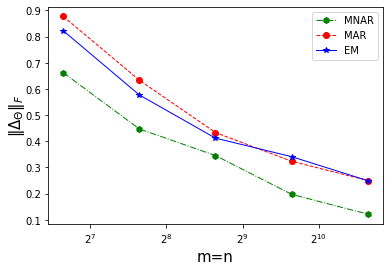

In [42]:
plt.xlabel("m=n", font_x)
# plt.ylim([0, 1]) #for p=200 linear
plt.ylabel(r"$\Vert\Delta_{\mathrm{\Theta}}\Vert_F$", font_y)
plt.plot(ms, errTs["MNAR"], "g-.h", label="MNAR", linewidth=1)
plt.plot(ms, errTs["MAR"], "r--o", label="MAR", linewidth=1)
plt.plot(ms, errTs["EM"], "b-*", label="EM", linewidth=1)
plt.xscale("log", base=2)
plt.legend(loc=1)

In [43]:
errBs["MAR"]

[3.957763969973283,
 3.2799391277995538,
 1.1861792344593032,
 1.0287764044126297,
 1.033123584518711]

In [44]:
errBs["EM"]

[3.560531700119647,
 1.523461977591483,
 1.0383952846056652,
 1.0234708358064846,
 0.9384001408303192]

In [45]:
errBs["MNAR"]

[2.968428209254714,
 1.0814557079587956,
 1.003636552861462,
 0.99838581260705,
 0.9815567962616228]

In [17]:
errTs["MNAR"]

[0.6619277430538404,
 0.44719774685527475,
 0.3663801740352091,
 0.1975256445932475,
 nan]

In [38]:
res[1].keys()

dict_keys(['numI', 'Cb', 'CT', 'errb', 'errT', 'Berrs', 'Terrs', 'beta0', 'bTheta0', 'betahat', 'bThetahat'])

In [40]:
errTsEM

defaultdict(list,
            {100: [array(0.82260282),
              array(0.82225651),
              array(0.82212745),
              array(0.82220176),
              array(0.82244481),
              array(0.82269417),
              array(0.82258817),
              array(0.82183469),
              array(0.82187488),
              array(0.82216431)],
             200: [array(0.57708604),
              array(0.57733699),
              array(0.57699551),
              array(0.57696313),
              array(0.57682816),
              array(0.5771124),
              array(0.57709104),
              array(0.57701936),
              array(0.57708815),
              array(0.57700326)],
             400: [array(0.41204713),
              array(0.41211713),
              array(0.41211259),
              array(0.41206115),
              array(0.41210506),
              array(0.4120782),
              array(0.41210488),
              array(0.41210453),
              array(0.41205675),
          